In [8]:
import tensorflow as tf
import mtcnn
from mtcnn import MTCNN
import PIL
from PIL import Image
import numpy as np
import pandas as pd
from IPython.display import display
import os
import matplotlib.pyplot as pyplot

In [13]:
def extract_face(filename):
    #Open the File
    image = Image.open(filename)
    #print(filename)
    #Convert the file to RGB
    image = image.convert('RGB')
    
    #Convert the File to Numpy array to be machine readable
    pixels = np.asarray(image)
    
    #Creating a Face Detector using MTCNN
    detector = MTCNN()
    
    #Extracting Face embeddings from the Photo
    result = detector.detect_faces(pixels)
    if len(result) == 0:
        print ('Face in the photo {} could not be detected'.format(filename))
        return []
    else:
        x1, y1, width, height = result[0]['box']
        x1, y1 = abs(x1) , abs(y1)
        x2, y2 = abs(x1) + width , abs(y1) + height 
        face = pixels[y1:y2, x1:x2]
        image = Image.fromarray(face)
        image = image.resize((160,160))
        face_array = np.asarray(image)
        return face_array  

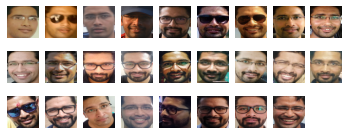

In [15]:
folder = '../data/train/aditya_solanki/'
i = 1
for image in os.listdir(folder):
    path = folder + image
    face = extract_face(path)
    if len(face) == 0:
        continue
    else:
        pyplot.subplot(5, 9, i)
        pyplot.axis('off')
        pyplot.imshow(face)
    i += 1
pyplot.show()